In [1]:
import collections
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from IPython.display import Markdown, display
import random
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
x_train= np.load('/content/mydrive/My Drive/Research/KMNIST_PCA_Encoder/KMNIST/kmnist-train-imgs.npz')['arr_0']
y_train= np.load('/content/mydrive/My Drive/Research/KMNIST_PCA_Encoder/KMNIST/kmnist-train-labels.npz')['arr_0']
x_test= np.load('/content/mydrive/My Drive/Research/KMNIST_PCA_Encoder/KMNIST/kmnist-test-imgs.npz')['arr_0']
y_test= np.load('/content/mydrive/My Drive/Research/KMNIST_PCA_Encoder/KMNIST/kmnist-test-labels.npz')['arr_0']
#x_train = x_train.reshape(-1, 784)
#x_test = x_test.reshape(-1, 784)
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


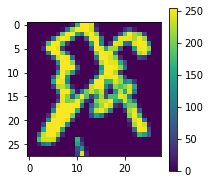

Image (#1902): Which is label number '9', or label 'ya''


In [5]:
labelNames=["ha","ki","ma","na","o","re","su","tsu","wo","ya"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

In [6]:
#Normalize Data

In [7]:
print(x_train.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

(60000, 28, 28)


In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#import SVM, KNN, Random Forest and Decision Tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train, y_train)

end1 = time.time()
svm_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

end2 = time.time()
knn_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train, y_train)

end3 = time.time()
forest_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train, y_train)

end4 = time.time()
tree_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

SVM Time: 16.26 minute
KNN Time: 0.78 minute
Random Forest Time: 1.96 minute
Decision Tree Time: 0.71 minute


-----------------SVM Report---------------
F1 score: 0.7330789275894304
Accuracy score: 0.7308
Confusion matrix: 
 [[818   8   3  10  35  40   1  45  25  15]
 [  6 755  56  14  27  11  75   4  31  21]
 [  8  74 695  60  32  15  38  17  32  29]
 [  6  40  65 817   6  29   4   9  20   4]
 [ 65  59  57  17 693  14  34  15  19  27]
 [  8  31 121  23  17 736  25   3  25  11]
 [  4  47 124  11  31  12 746   8  13   4]
 [ 19  58  30  21  95  21  45 616  53  42]
 [ 13  60  52  44   7  22  37   1 758   6]
 [  8  77  86  10  52  20  16  20  37 674]]
Plotting confusion matrix


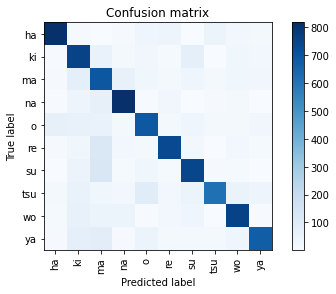

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.62      0.76      0.68      1000
           2       0.54      0.69      0.61      1000
           3       0.80      0.82      0.81      1000
           4       0.70      0.69      0.69      1000
           5       0.80      0.74      0.77      1000
           6       0.73      0.75      0.74      1000
           7       0.83      0.62      0.71      1000
           8       0.75      0.76      0.75      1000
           9       0.81      0.67      0.74      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [ ]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

-----------------K-nearest neighbors Report---------------
F1 score: 0.9135404641416515
Accuracy score: 0.9133
Confusion matrix: 
 [[901   0   1   2   2  31   0  20  43   0]
 [  1 916  27   1   5   2  33   0   8   7]
 [  9   8 876  48   8  14  16   2  17   2]
 [  1   4  16 970   0   6   1   1   1   0]
 [ 12  17  14  17 876  12  13   1  32   6]
 [  1   5  46  10   3 922   7   0   4   2]
 [  5   2  19   8  11   2 948   1   2   2]
 [  7  13  16   5  11   8  13 891  24  12]
 [  0  16  12   6   0   8  13   0 945   0]
 [  2  33  24   1   7   3  10   9  23 888]]
Plotting confusion matrix


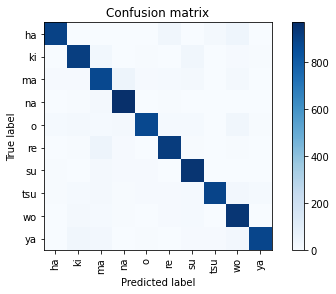

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1000
           1       0.90      0.92      0.91      1000
           2       0.83      0.88      0.85      1000
           3       0.91      0.97      0.94      1000
           4       0.95      0.88      0.91      1000
           5       0.91      0.92      0.92      1000
           6       0.90      0.95      0.92      1000
           7       0.96      0.89      0.93      1000
           8       0.86      0.94      0.90      1000
           9       0.97      0.89      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [ ]:
# KNN report and analysis
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn))

-----------------Random Forest Report---------------
F1 score: 0.8611709901681552
Accuracy score: 0.8611
Confusion matrix: 
 [[891   2   2   1  18  16   2  32  31   5]
 [  5 851  23   3  23   4  52   4  16  19]
 [ 11  24 833  28  11   7  29  15  21  21]
 [  5  16  14 943   1   0   0   3   5  13]
 [ 50  26  17  13 811   3  29  11  33   7]
 [  5  16  79  11  14 833  35   1   4   2]
 [  2  16  26   6  26   2 910   7   1   4]
 [ 16  23  16   4  88   1  15 784  31  22]
 [  9  26   7  18   2   6  20   2 906   4]
 [ 15  12  33   2  40   1   2  33  13 849]]
Plotting confusion matrix


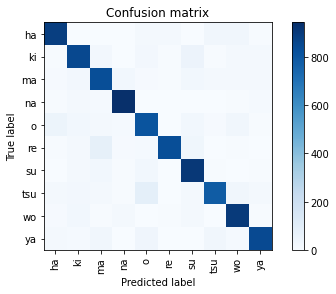

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1000
           1       0.84      0.85      0.85      1000
           2       0.79      0.83      0.81      1000
           3       0.92      0.94      0.93      1000
           4       0.78      0.81      0.80      1000
           5       0.95      0.83      0.89      1000
           6       0.83      0.91      0.87      1000
           7       0.88      0.78      0.83      1000
           8       0.85      0.91      0.88      1000
           9       0.90      0.85      0.87      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(x_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted")
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)
random_forest_cm = metrics.confusion_matrix(y_test, y_pred_forest)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest))

-----------------Decision Tree Report---------------
F1 score: 0.6487043742774196
Accuracy score: 0.6481
Confusion matrix: 
 [[660   9  12  32  50  57  23  77  56  24]
 [  5 679  38  16  55  23  64  15  62  43]
 [ 19  70 605  44  39  37  49  17  55  65]
 [ 22  38  50 688  22  58  15  23  51  33]
 [ 54  52  54  34 587  23  67  34  35  60]
 [ 16  46  78  20  39 695  37  15  34  20]
 [ 12  46  66  22  64  19 694  20  25  32]
 [ 39  45  37  26  99  18  72 562  46  56]
 [ 32  74  50  41  32  32  38  14 654  33]
 [ 21  60  64  20  58  15  29  43  33 657]]
Plotting confusion matrix


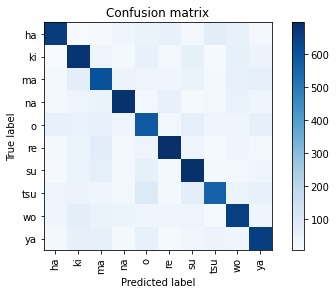

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.61      0.68      0.64      1000
           2       0.57      0.60      0.59      1000
           3       0.73      0.69      0.71      1000
           4       0.56      0.59      0.57      1000
           5       0.71      0.69      0.70      1000
           6       0.64      0.69      0.66      1000
           7       0.69      0.56      0.62      1000
           8       0.62      0.65      0.64      1000
           9       0.64      0.66      0.65      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [ ]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(x_test)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
tree_cm = metrics.confusion_matrix(y_test, y_pred_tree)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))
print("Confusion matrix: \n", tree_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree))

In [ ]:
#Feature Extraction Using PCA
print(x_train.shape)

(60000, 784)


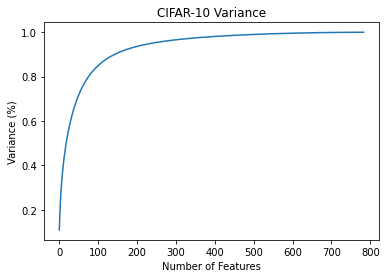

In [ ]:
from sklearn.decomposition import PCA
# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('CIFAR-10 Variance')
plt.show()

In [ ]:
pca = PCA(n_components=500)
pca.fit(x_train)

PCA(n_components=500)

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
x_train_pca.shape

(60000, 500)

In [ ]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train_pca, y_train)

end1 = time.time()
svm_pca_time = end1-start1

# KNN Model
start2 = time.time()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)
y_pred_knn_pca = knn.predict(x_test_pca)

end2 = time.time()
knn_pca_time = end2-start2

# Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(x_train_pca, y_train)

end3 = time.time()
forest_pca_time = end3-start3

# Decision Tree
start4 = time.time()

tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_pca, y_train)

end4 = time.time()
tree_pca_time = end4-start4

print("SVM Time: {:0.2f} minute".format(svm_pca_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_pca_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_pca_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_pca_time/60.0))

SVM Time: 16.25 minute
KNN Time: 0.56 minute
Random Forest Time: 11.88 minute
Decision Tree Time: 3.39 minute


-----------------SVM Report---------------
F1 score: 0.7427913810224697
Accuracy score: 0.7408
Confusion matrix: 
 [[831   4   2  12  31  36   2  40  30  12]
 [  5 753  56  13  29  10  78   4  27  25]
 [  8  67 719  56  26  14  36  11  38  25]
 [  7  32  64 834   8  25   4   5  19   2]
 [ 73  57  56  17 694  13  38  14  15  23]
 [  6  30 112  18  18 746  21   4  31  14]
 [  3  42 132  13  22  13 749  10  11   5]
 [ 24  47  37  12  92  23  43 622  54  46]
 [ 10  48  50  49   8  23  41   0 764   7]
 [  6  62  83  13  54  19  16  15  36 696]]
Plotting confusion matrix


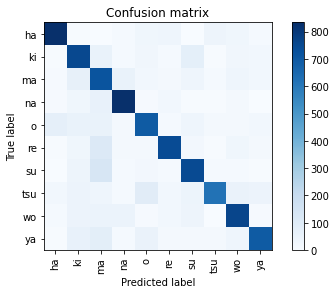

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.66      0.75      0.70      1000
           2       0.55      0.72      0.62      1000
           3       0.80      0.83      0.82      1000
           4       0.71      0.69      0.70      1000
           5       0.81      0.75      0.78      1000
           6       0.73      0.75      0.74      1000
           7       0.86      0.62      0.72      1000
           8       0.75      0.76      0.75      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [ ]:
# SVM report and analysis
y_pred_svc_pca = svc.predict(x_test_pca)
svc_pca_f1 = metrics.f1_score(y_test, y_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_test, y_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1))
print("Accuracy score: {}".format(svc_pca_accuracy))
print("Confusion matrix: \n", svc_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_pca))

-----------------K-nearest neighbors Report---------------
F1 score: 0.9148391060875634
Accuracy score: 0.9146
Confusion matrix: 
 [[904   0   2   1   2  27   0  21  43   0]
 [  1 920  23   1   5   2  34   0   8   6]
 [  9   8 877  48   8  13  15   3  17   2]
 [  1   5  18 968   0   6   1   1   0   0]
 [ 13  17  15  17 878  12  13   1  29   5]
 [  1   5  47   9   3 922   8   0   3   2]
 [  5   2  19   9  11   3 947   1   2   1]
 [  9  10  17   6  11   7  14 891  23  12]
 [  0  15  12   6   0   8  12   0 947   0]
 [  4  33  22   1   5   2  11   8  22 892]]
Plotting confusion matrix


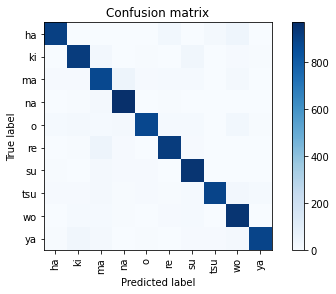

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1000
           1       0.91      0.92      0.91      1000
           2       0.83      0.88      0.85      1000
           3       0.91      0.97      0.94      1000
           4       0.95      0.88      0.91      1000
           5       0.92      0.92      0.92      1000
           6       0.90      0.95      0.92      1000
           7       0.96      0.89      0.93      1000
           8       0.87      0.95      0.90      1000
           9       0.97      0.89      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [ ]:
# KNN report and analysis
knn_pca_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_pca_accuracy = metrics.accuracy_score(y_test, y_pred_knn_pca)
knn_pca_cm = metrics.confusion_matrix(y_test, y_pred_knn_pca)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_pca_f1))
print("Accuracy score: {}".format(knn_pca_accuracy))
print("Confusion matrix: \n", knn_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(knn_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_knn_pca))

-----------------Random Forest Report---------------
F1 score: 0.7749426784724467
Accuracy score: 0.7759
Confusion matrix: 
 [[835   2   1   9  18  25   3  47  56   4]
 [  9 800  39   4  21   7  61   5  27  27]
 [  9  25 740  57  18   8  49  26  35  33]
 [  6  16  25 886   8   7  13   8  24   7]
 [ 64  40  34  21 732   4  28  14  50  13]
 [  7  23  87  33  15 763  47   4  16   5]
 [  4  29  47  16  43   1 830  16   3  11]
 [ 26  24  36  11 159   8  47 557 115  17]
 [ 21  25  11  32   4   4  35   6 852  10]
 [  8  53  49   7  50   4  15  17  33 764]]
Plotting confusion matrix


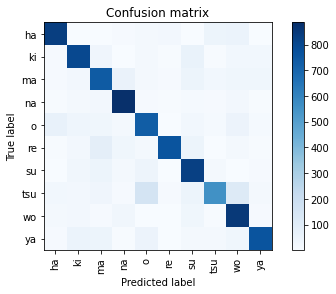

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.77      0.80      0.79      1000
           2       0.69      0.74      0.72      1000
           3       0.82      0.89      0.85      1000
           4       0.69      0.73      0.71      1000
           5       0.92      0.76      0.83      1000
           6       0.74      0.83      0.78      1000
           7       0.80      0.56      0.66      1000
           8       0.70      0.85      0.77      1000
           9       0.86      0.76      0.81      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



In [ ]:
# Random Forest report and analysis
y_pred_forest_pca = random_forest.predict(x_test_pca)
random_forest_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, average= "weighted")
random_forest_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
random_forest_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_pca_f1))
print("Accuracy score: {}".format(random_forest_pca_accuracy))
print("Confusion matrix: \n", random_forest_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(random_forest_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_forest_pca))

-----------------Decision Tree Report---------------
F1 score: 0.6637919437576149
Accuracy score: 0.6621
Confusion matrix: 
 [[691  23   3  20  43  69  14  50  71  16]
 [ 10 670  50  12  41  20  76  12  68  41]
 [ 11  46 642  48  34  39  57  28  56  39]
 [ 20  31  65 723  17  45  23  14  40  22]
 [ 50  67  44  42 594  28  58  23  47  47]
 [ 16  41  93  27  31 684  50   9  42   7]
 [ 10  64  91  15  64  12 672  22  29  21]
 [ 25  35  73  24  86  20  65 576  62  34]
 [ 21  81  33  46  23  34  41  12 678  31]
 [ 11  38  86  21  75  13  19  15  31 691]]
Plotting confusion matrix


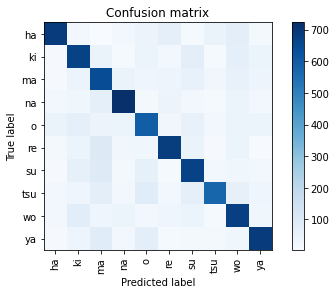

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.61      0.67      0.64      1000
           2       0.54      0.64      0.59      1000
           3       0.74      0.72      0.73      1000
           4       0.59      0.59      0.59      1000
           5       0.71      0.68      0.70      1000
           6       0.63      0.67      0.65      1000
           7       0.76      0.58      0.65      1000
           8       0.60      0.68      0.64      1000
           9       0.73      0.69      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [ ]:
# Decision Tree report and analysis
y_pred_tree_pca = tree.predict(x_test_pca)
tree_pca_f1 = metrics.f1_score(y_test, y_pred_tree_pca, average= "weighted")
tree_pca_accuracy = metrics.accuracy_score(y_test, y_pred_tree_pca)
tree_pca_cm = metrics.confusion_matrix(y_test, y_pred_tree_pca)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_pca_f1))
print("Accuracy score: {}".format(tree_pca_accuracy))
print("Confusion matrix: \n", tree_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(tree_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_tree_pca))